# Performing Required Imports

In [2]:
from keras.models import Sequential
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.datasets import mnist
import keras
from tensorflow.keras.layers import Conv2D
import numpy as np
from keras.utils import np_utils
import matplotlib.pyplot as plt

# Loading MNIST Dataset

11490434/11490434 [==============================] - 23s 2us/step


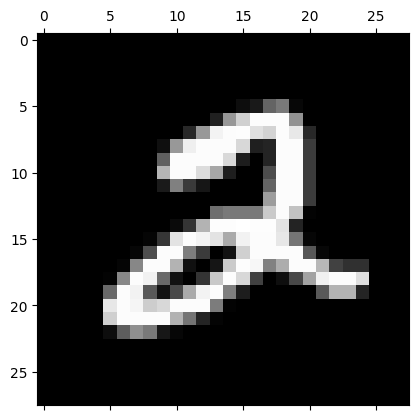

2


In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
#x_train is train images
#y_train is train labels
#x_test is validation images
#y_test is validation labels
plt.matshow(x_train[5] , cmap = 'gray')
plt.show()
print(y_train[5])

# Adding an extra dimension to make the input inline with the model (padding)

In [4]:
x_train = x_train[:,:,:,np.newaxis]
x_test = x_test[:,:,:,np.newaxis]

# Transform the training and test labels into vectors in the range [0, classes] -- This generates a vector for each label, where the index of the label is set to 1 and all other entries to 0; in the case of MNIST, there are 10 class labels

In [5]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# Checking dimensions of data

In [6]:
np.shape(x_train), np.shape(y_train), np.shape(x_test), np.shape(y_test)

((60000, 28, 28, 1), (60000, 10), (10000, 28, 28, 1), (10000, 10))

# LeNet-5 Model 

In [7]:
model = Sequential()

#Layer 1
#Conv Layer 1
model.add(Conv2D(filters=6, kernel_size=5, strides=1, activation='sigmoid', input_shape = (28,28,1)))
#pooling layer 1
model.add(MaxPooling2D(pool_size=2, strides=2))

#Layer 2
#Conv Layer 2
model.add(Conv2D(filters=16, kernel_size=5, strides=1, activation='sigmoid', input_shape = (14,14,6)))
#pooling layer 2
model.add(MaxPooling2D(pool_size=2, strides=2))

#Flatten
model.add(Flatten())

#Layer 3
#Fully connected layer 1
model.add(Dense(units=120, activation='sigmoid'))

#Layer 4 
#Fully connected layer 2
model.add(Dense(units=84, activation='sigmoid'))

#Layer 5 
#Output Layer
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Training The Model

In [8]:
model.fit(x_train, y_train, epochs=8, batch_size=10, validation_split=0.2)

Epoch 1/8
4800/4800 [==============================] - 29s 6ms/step - loss: 0.3521 - accuracy: 0.8968 - val_loss: 0.0907 - val_accuracy: 0.9708
Epoch 2/8
4800/4800 [==============================] - 26s 5ms/step - loss: 0.0889 - accuracy: 0.9721 - val_loss: 0.0742 - val_accuracy: 0.9752
Epoch 3/8
4800/4800 [==============================] - 26s 5ms/step - loss: 0.0663 - accuracy: 0.9792 - val_loss: 0.0612 - val_accuracy: 0.9808
Epoch 4/8
4800/4800 [==============================] - 25s 5ms/step - loss: 0.0545 - accuracy: 0.9831 - val_loss: 0.0562 - val_accuracy: 0.9833
Epoch 5/8
4800/4800 [==============================] - 25s 5ms/step - loss: 0.0475 - accuracy: 0.9848 - val_loss: 0.0551 - val_accuracy: 0.9844
Epoch 6/8
4800/4800 [==============================] - 26s 5ms/step - loss: 0.0415 - accuracy: 0.9872 - val_loss: 0.0611 - val_accuracy: 0.9812
Epoch 7/8
4800/4800 [==============================] - 25s 5ms/step - loss: 0.0363 - accuracy: 0.9880 - val_loss: 0.0459 - val_accuracy:

# Testing The Model

In [9]:
(loss, accuracy) = model.evaluate(x_test, y_test, batch_size=128, verbose=1)
print("accuracy: {:.2f}%".format(accuracy * 100))

79/79 [==============================] - 1s 8ms/step - loss: 0.0615 - accuracy: 0.9812
accuracy: 98.12%
